### seaborn
- matplotlib에 비해 보다 효율적으로, 손쉽고 퀄리티 높게 시각화 수행 가능
- seaborn.pydata.org

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from korea_font import initKoreaFontLoad
initKoreaFontLoad()

Malgun Gothic


In [3]:
# seaborn 로드
import seaborn as sns

###### sns.set_style( '' )

In [4]:
# 뒷배경
sns.set_style('whitegrid')

In [6]:
# 기본 데이터
# tips : 요일별 점심/저녁, 흡연여부, 식사금액, 팁 금액, 성별, 인원수
tips = sns.load_dataset('tips')
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


###### sns.boxplot(  )

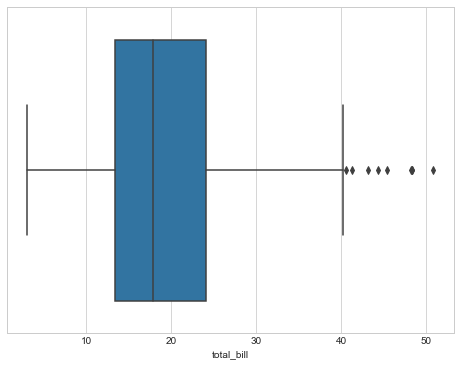

In [7]:
# 데이터 표현
# 가격대가 어디에 몰려 있는지
plt.figure(figsize=(8, 6))
sns.boxplot(tips['total_bill'])
plt.show()

###### sns.boxplot(x=, y=, data= )

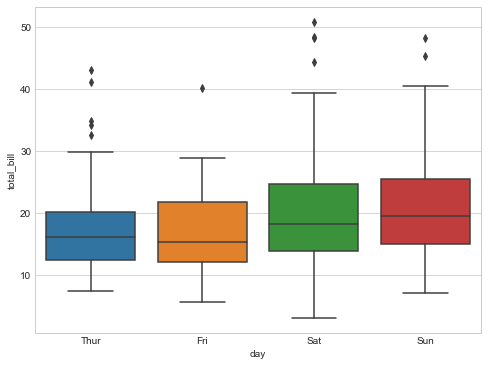

In [8]:
plt.figure(figsize = (8, 6))
# x, y축에 대한 컬럼을 지정, 데이터를 별도로 대입
sns.boxplot(x='day', y='total_bill', data=tips)
plt.show()

###### hue 속성

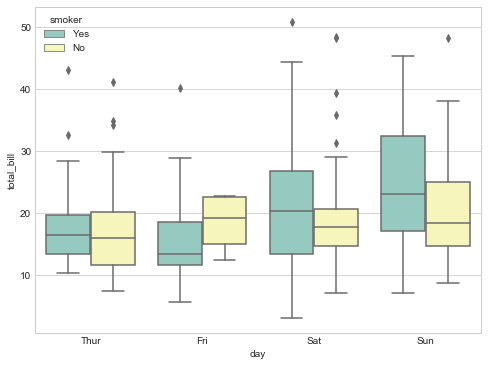

In [10]:
# 위의 시각화 자료에 흡연 여부 추가
plt.figure(figsize = (8, 6))
sns.boxplot(x='day', y='total_bill', hue='smoker', data=tips, palette='Set3')
plt.show()

###### 무리 형태로 '포인트' 중심 시각화 : swarmplot()

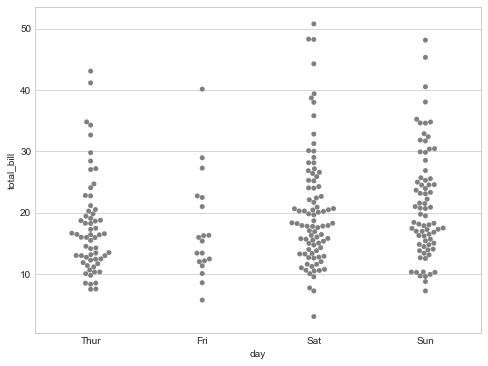

In [12]:
plt.figure(figsize = (8, 6))
sns.swarmplot(x='day', y='total_bill', data=tips, color='0.5')
plt.show()

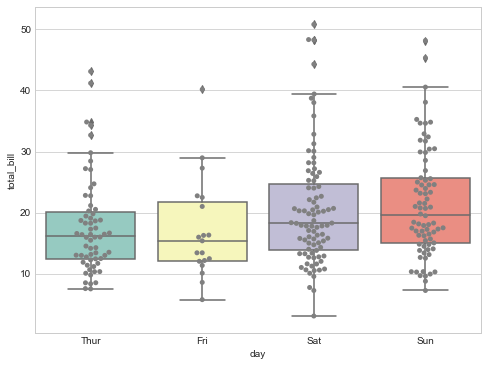

In [14]:
plt.figure(figsize = (8, 6))
sns.boxplot(x='day', y='total_bill', data=tips, palette='Set3')
sns.swarmplot(x='day', y='total_bill', data=tips, color='0.5')
plt.show()

### 산포도 + 평균선(x, y에 대한 1차함수) : sns.lmplot()

<Figure size 432x288 with 0 Axes>

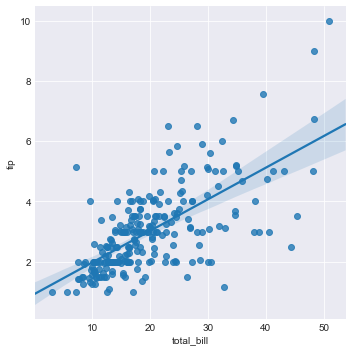

In [18]:
plt.figure()
sns.set_style('darkgrid')
# matplotlib에서는 scatter
sns.lmplot(x='total_bill', y='tip', data=tips, size=5)
plt.show()

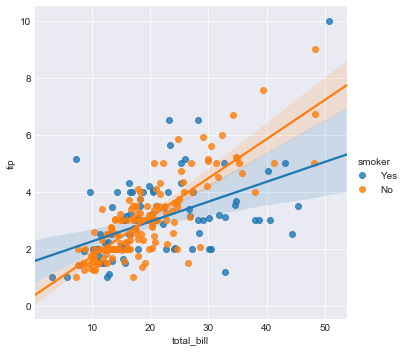

In [20]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips, size=5)
plt.show()

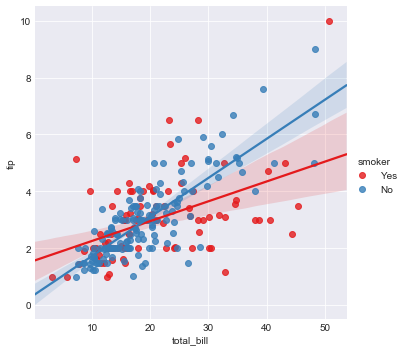

In [21]:
# matplotlib에 비해 코드량이나 작업량이 훨씬 간결하고 파워풀하다
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips, size=5, palette='Set1')
plt.show()

### 히트맵 : sns.heatmap( )

###### np.random.rand( 10, 12 ) -> (10, 12) 형태로 랜덤값 부여

In [22]:
# 더미 데이터
data = np.random.rand(10, 12)
data.shape

(10, 12)

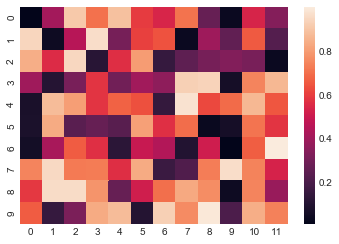

In [24]:
sns.heatmap(data)
plt.show()

In [25]:
flights = sns.load_dataset('flights')
flights.shape

(144, 3)

In [26]:
flights.head(3)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132


In [27]:
flights['year'].unique(), len(flights['year'].unique())

(array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
        1960], dtype=int64), 12)

In [28]:
flights['month'].unique(), len(flights['month'].unique())

([January, February, March, April, May, ..., August, September, October, November, December]
 Length: 12
 Categories (12, object): [January, February, March, April, ..., September, October, November, December],
 12)

In [32]:
# pd.pivot_table(flights, index='month', columns='year', values='passengers')
flights_piv = flights.pivot('month', 'year', 'passengers')
flights_piv

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


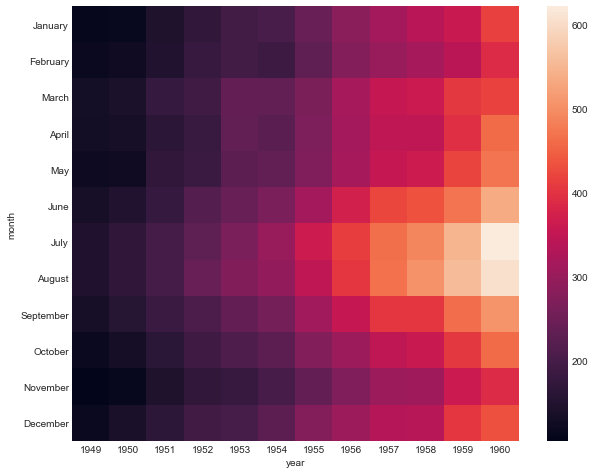

In [35]:
# 히트맵을 통해서 고객수가 어느 방향(년도, 월)으로 증가하고 있는지, 기세를 확인
plt.figure(figsize=(10, 8))
sns.heatmap(flights_piv)
plt.show()

###### 히트맵 내 데이터 세팅 : annot=True, fmt 

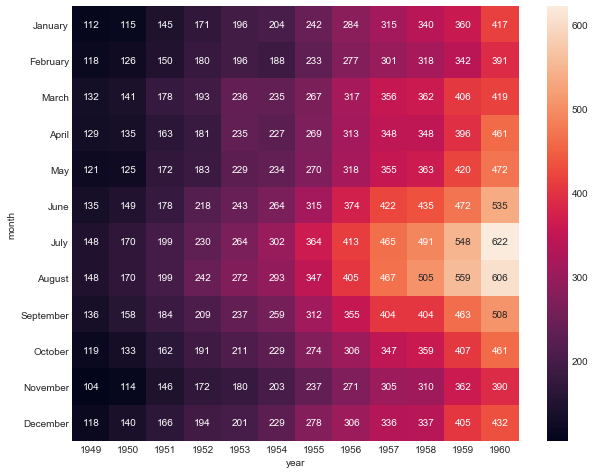

In [36]:
plt.figure(figsize=(10, 8))
# 데이터 세팅
# annot : 숫자 세팅
# fmt : 수치의 타입
sns.heatmap(flights_piv, annot=True, fmt='d')
plt.show()

### 산포 행렬 : sns.pairplot( )

In [37]:
iris = sns.load_dataset('iris')
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


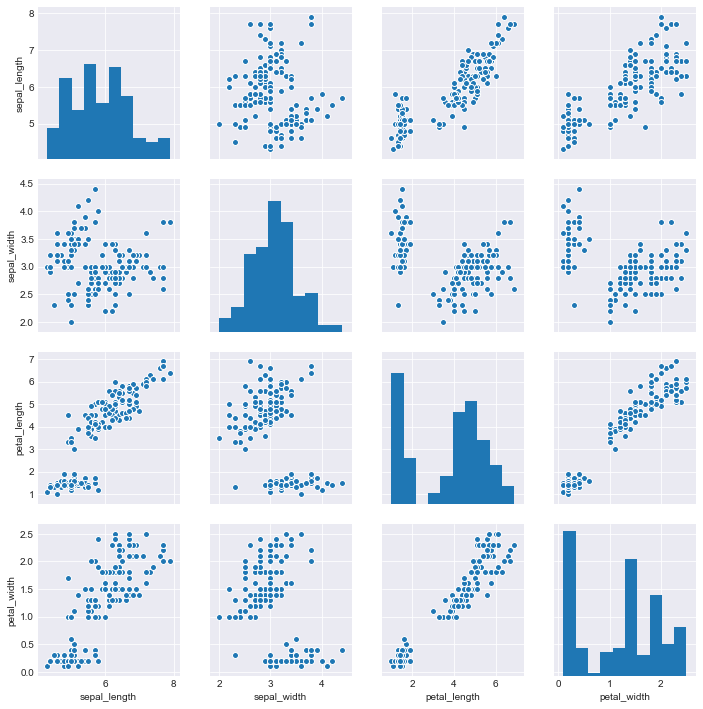

In [39]:
# 대각선 기준으로 대칭으로 확인
sns.pairplot(iris)
plt.show()

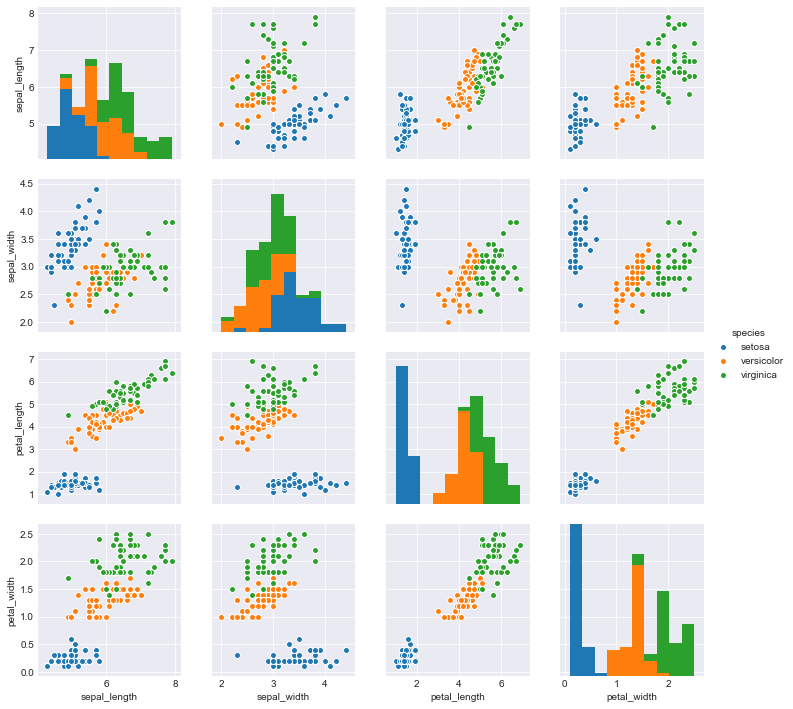

In [40]:
sns.pairplot(iris, hue='species')
plt.show()

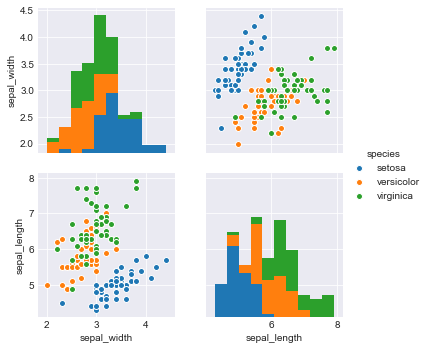

In [41]:
sns.pairplot(iris, hue='species', vars=['sepal_width', 'sepal_length'])
plt.show()

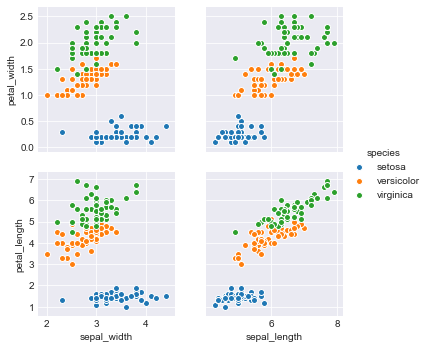

In [42]:
sns.pairplot(iris, hue='species', 
             x_vars=['sepal_width', 'sepal_length'],
             y_vars=['petal_width', 'petal_length'])
plt.show()